In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm
import time 
import Yahooimport as Y
import GridSearchLstm as Gs
import matplotlib.pyplot as plt
import numpy as np
import math

Using TensorFlow backend.


[*********************100%***********************]  1 of 1 downloaded


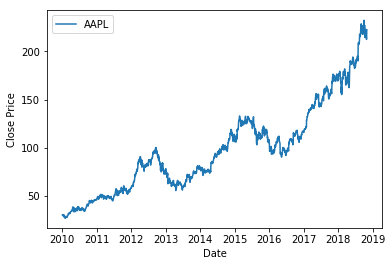

In [2]:
#Step 1 Load Data

# (1) TO DO: Make the loading of data dynamic based on user input

ticker = 'AAPL'#AAPL

data = Y.retrieve_data(ticker,'2010-01-01','2018-11-01')

plt.plot(data.iloc[:,3],label=ticker)
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()

# Select only the Close data as the test value
data = data.iloc[:,3]

# (2) TO DO: Update the X_train, X_test to use additional inputs (need to figure these out)

#X_train, y_train, X_test, y_test = lstm.load_data('AAPL.csv', 50, False,0.8)

In [3]:
#Step 2 Build Model

# Perform a grid search of the LSTM model.  Change these values to get a different set of models
# For example, to also test a lag of 10 days, change N_input to [7,10]

N_input = [100]
N_nodes = [200]#,100]
N_epochs = [50]
N_batch = [50]
N_diff = [12]
N_split = [0.7] #This is the test train split, as a percentage

cfg_list = Gs.model_configs(N_input, N_nodes, N_epochs, N_batch, N_diff, N_split)

matrix =[lstm.model_fit(data, cfg) for cfg in cfg_list]




Total configs: 1
Train on 1189 samples, validate on 298 samples
Epoch 1/50
1189/1189 [==============================] - 4s 3ms/step - loss: 2403.7306 - mean_squared_error: 2403.7306 - val_loss: 705.0784 - val_mean_squared_error: 705.0784

Epoch 00001: val_loss improved from inf to 705.07845, saving model to LSTM-weights-best.hdf5
Epoch 2/50
1189/1189 [==============================] - 2s 2ms/step - loss: 680.5746 - mean_squared_error: 680.5746 - val_loss: 512.2658 - val_mean_squared_error: 512.2658

Epoch 00002: val_loss improved from 705.07845 to 512.26584, saving model to LSTM-weights-best.hdf5
Epoch 3/50
1189/1189 [==============================] - 2s 1ms/step - loss: 232.5979 - mean_squared_error: 232.5979 - val_loss: 108.4747 - val_mean_squared_error: 108.4747

Epoch 00003: val_loss improved from 512.26584 to 108.47466, saving model to LSTM-weights-best.hdf5
Epoch 4/50
1189/1189 [==============================] - 2s 1ms/step - loss: 55.6793 - mean_squared_error: 55.6793 - val_loss

1189/1189 [==============================] - 2s 2ms/step - loss: 16.1020 - mean_squared_error: 16.1020 - val_loss: 10.9233 - val_mean_squared_error: 10.9233

Epoch 00036: val_loss did not improve from 3.22791
Epoch 37/50
1189/1189 [==============================] - 2s 2ms/step - loss: 16.2081 - mean_squared_error: 16.2081 - val_loss: 10.8734 - val_mean_squared_error: 10.8734

Epoch 00037: val_loss did not improve from 3.22791
Epoch 38/50
1189/1189 [==============================] - 2s 2ms/step - loss: 16.9897 - mean_squared_error: 16.9897 - val_loss: 20.5398 - val_mean_squared_error: 20.5398

Epoch 00038: val_loss did not improve from 3.22791
Epoch 39/50
1189/1189 [==============================] - 2s 2ms/step - loss: 13.3066 - mean_squared_error: 13.3066 - val_loss: 3.9151 - val_mean_squared_error: 3.9151

Epoch 00039: val_loss did not improve from 3.22791
Epoch 40/50
1189/1189 [==============================] - 2s 2ms/step - loss: 19.7197 - mean_squared_error: 19.7197 - val_loss: 70.

In [ ]:
#for model in models:
#    model.summary()

model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(
    500))
model.add(Dropout(0.2))
model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

In [4]:
model=matrix[0][0]
X_test=matrix[0][1]
Y_test=matrix[0][2]
X_train=matrix[0][3]
Y_train=matrix[0][4]
#model.load_weights("LSTM-weights-best.hdf5")

In [ ]:
model.summary()

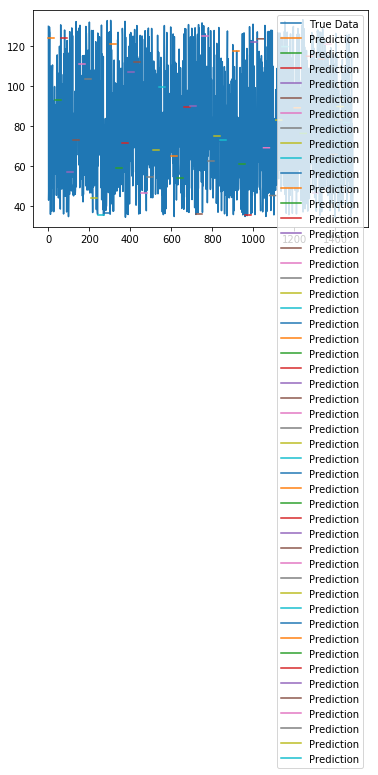

In [11]:
#Step 4 - Plot the predictions!
window_size=30
prediction_length=30

#X_test=

predictions = lstm.predict_sequences_multiple(model, X_train,window_size,prediction_length)
lstm.plot_results_multiple(predictions, Y_train, prediction_length)

# (4) TO DO: Implement the trading aspect of the model, and output parameters such as CAGR, Sharpe ratio etc.

In [ ]:
predictions[2]

In [ ]:
np.mean(predictions[1])

In [ ]:
Y_test[0]

In [ ]:
length=math.floor(len(Y_test)/prediction_length)*prediction_length # prediction length
#length=len(predictions)
print(length)
predict_trend=np.ones(length)
predict_trend1=np.ones(length)

for i in range(length):
    step=math.floor(i/prediction_length)
    #print(step)
    av=np.mean(predictions[step])
    predict_trend[i]=np.where(Y_test[step*prediction_length]>av,-1,1)
    
    f_l=predictions[step][0]<predictions[step][prediction_length-1]
    predict_trend1[i]=np.where(f_l,1,-1)
   
    

from sklearn.metrics import accuracy_score

#acc= accuracy_score(list(y_test),list(predict_trend))

In [ ]:
predict_trend

In [ ]:
predict_trend1+predict_trend